## Agents and Inteligence

In this tutorial, we think classifiers as agents. When we have enough experience we will discuss how to embed classifiers into the mind of agents.

We start with a toy example, composed of 50 instances. Data has two hypothetical features, feature0 and feature1. 

 - **40 negative examples**: low values for both features
 - **10 positive examples**: high values for both features
  
We want our classifiers to distinguish positive examples from negative examples.

# Generate Data

In [1]:
import numpy as np
n_negative, n_positive = 40, 10

X_negative = np.random.randint(low=0, high =10, size=(n_negative,2))
X_positive = np.random.randint(low=90, high =100, size=(n_positive,2))

y_negative, y_positive = np.zeros(n_negative), np.ones(n_positive)

X = np.concatenate((X_negative, X_positive))
y = np.concatenate((y_negative, y_positive))
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [2]:
np.shape(X)

(50, 2)

In [3]:
actual = {0: "negative", 1:"positive"}
actual

{0: 'negative', 1: 'positive'}

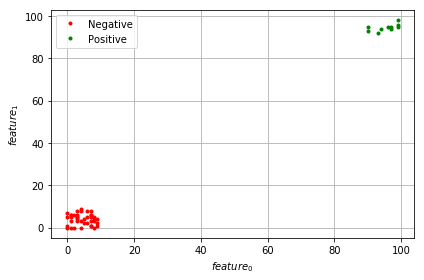

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_negative[:,0],X_negative[:,1], "o",  markersize=3, color='red', label="Negative")
plt.plot(X_positive[:,0],X_positive[:,1],"o",  markersize=3, color='green', label="Positive")
plt.xlabel("$feature_0$");plt.ylabel("$feature_1$"); plt.grid(); plt.legend()
plt.tight_layout()

# Split Data into train and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [6]:
X_test

array([[ 3,  3],
       [ 0,  1],
       [ 3,  6],
       [90, 95],
       [ 9,  4],
       [ 2,  0],
       [ 1,  6],
       [96, 95],
       [94, 94],
       [ 9,  1]])

In [7]:
y_test

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.])

In [8]:
y_values = [actual[val] for val in y_test]
y_values

['negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative']

## Data Preprocssing: 
Normalize data with feature preprocessing using minmax scaling

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[ 0.03030303,  0.03061224],
       [ 0.        ,  0.01020408],
       [ 0.03030303,  0.06122449],
       [ 0.90909091,  0.96938776],
       [ 0.09090909,  0.04081633],
       [ 0.02020202,  0.        ],
       [ 0.01010101,  0.06122449],
       [ 0.96969697,  0.96938776],
       [ 0.94949495,  0.95918367],
       [ 0.09090909,  0.01020408]])

## First Classifier
A dumb one!

In [11]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test_scaled)
y_dummy_predictions

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
predictions = [actual[p] for p in y_dummy_predictions]
predictions

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

## Evaluation with Confusion Matrix

|Predicted Negative|Predicted Positive
--- | --- | --- 
** Actual Negative**|TP|FN
** Actual Positive**|FN|TN

Look at the figure
- Postive: Pregnant
- Negative: Not Pregnant

<p align="center">
  <img src="figures/confusionmatrix.jpg" width="350"/>
</p>


In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_dummy_predictions)
confusion

array([[7, 0],
       [3, 0]])

## Try Different Machine Learning Algorithms.
With Sklearn it is very easy.

### Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)

confusion = confusion_matrix(y_test, lr_predictions)
confusion

array([[7, 0],
       [0, 3]])

### Decison Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train_scaled, y_train)
dtc_predicitions = dtc.predict(X_test_scaled)

confusion = confusion_matrix(y_test, dtc_predicitions)
confusion

array([[7, 0],
       [0, 3]])

### K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)
knn_predicitions = knn.predict(X_test_scaled)

confusion = confusion_matrix(y_test, knn_predicitions)
confusion

array([[7, 0],
       [0, 3]])